In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'height')

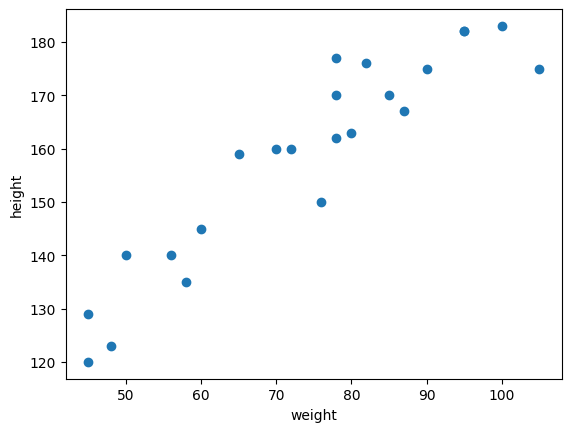

In [136]:
df = pd.read_csv('height-weight.csv')
plt.scatter(  df['Weight'] ,df['Height'])
plt.xlabel("weight")
plt.ylabel("height")

- ## Divide dataset into depedent and independent feature

In [ ]:
x = df[['Weight']] ## independent feature
y = df['Height'] ##dependent feature

In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size=0.20,random_state=42)

In [ ]:
xtrain.shape , xtest.shape ,ytrain.shape , ytest.shape


- Standard Scaling on train and test data - unit value ko standardize karna hai

- train data ko fit_transform 
- test data ko transform

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
xtrain= scalar.fit_transform(xtrain)

In [ ]:
xtest = scalar.transform(xtest)

## MODEL TRAINING

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
regressor.intercept_ , regressor.coef_

In [ ]:
plt.scatter(xtrain,ytrain ,c='r')
plt.plot(xtrain , regressor.predict(xtrain), 'b')

## Prediction of Train Data

1. Predicted height output = intercept + coef (Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

## Prediction of Test Data

1. Predicted height output = intercept + coef (Weights)
2. y_pred_test = 157.5 + 17.03(X_test)


In [ ]:
# prediction for test data 
y_pred_test = regressor.predict(xtest)
y_pred_test , ytest

In [ ]:
# preformance metrics
from sklearn.metrics import  mean_absolute_error , mean_squared_error , root_mean_squared_error
mse = mean_squared_error(ytest , y_pred_test)
mae = mean_absolute_error(ytest , y_pred_test)
rmse = root_mean_squared_error(ytest , y_pred_test)
mse , mae , rmse

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(ytest , y_pred_test)
score